In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame = False)

In [2]:
X, y = mnist.data, mnist.target

In [3]:
X.shape, y.shape # * X has 784 features

((70000, 784), (70000,))

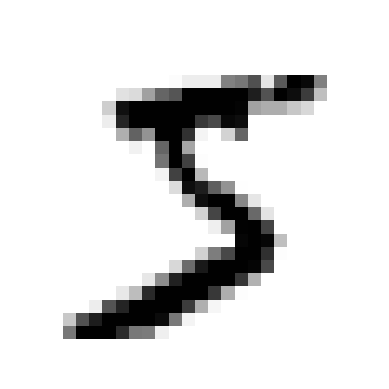

In [4]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap = "binary")
    plt.axis("off")

some_data= X[0]
plot_digit(some_data)
plt.show()

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [7]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state= 42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_data])

array([ True])

In [9]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [10]:
from sklearn.dummy import DummyClassifier # * Classifies everything in the most frequent class

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train))) # * No Fives

False


In [11]:
cross_val_score(dummy_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.90965, 0.90965, 0.90965])

Implementing Cross_Validation

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]


    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct /len(y_pred))

0.95035
0.96035
0.9604


In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    cloned_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    cloned_clf.fit(X_train_folds, y_train_folds)
    y_pred = cloned_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))


0.95035
0.96035
0.9604


Confusion Matrix = number of times Classifer misclassifies an instance

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)

In [16]:
cm

# * top left true negatives
# * top right false positives
# * bottom left false negatives
# * bottom right true positives

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [17]:

# * Precision = (TP)/(TP + FP)
# * recall = TP/(TP + FN)

In [18]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [19]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [20]:

# * F1 score = 2/((1/precision) + (1/recall))

In [21]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [22]:

# * Precision - Accuracy of positive predictions
# * Recall - ratio of positive instances correctly identified

In [23]:
y_scores = sgd_clf.decision_function([some_data])
y_scores

array([2164.22030239])

In [24]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [25]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = "decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [26]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

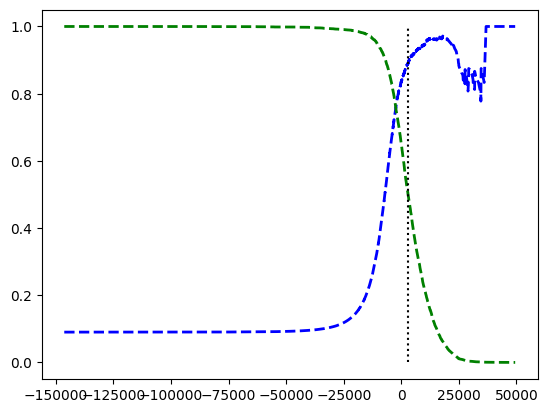

In [27]:
plt.plot(thresholds, precisions[:-1], "b--", label = "Precision", linewidth = 2)
plt.plot(thresholds, recalls[:-1], "g--", label = "Recall", linewidth = 2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label = threshold)
plt.show()

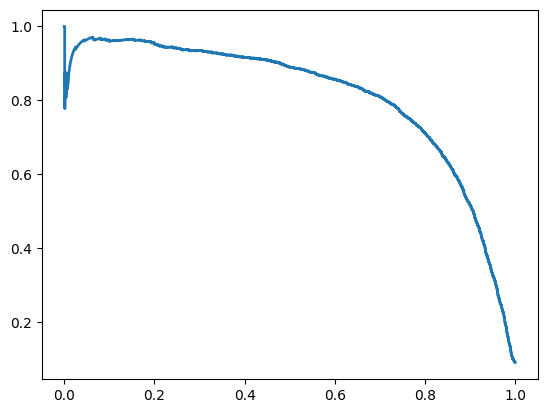

In [28]:
plt.plot(recalls, precisions, linewidth = 2, label = "Precision/Recall curve")
plt.show()

In [29]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [30]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [31]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [32]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

ROC Curve

In [33]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
# * tpr = true positive rate
# * fpr = 1 - (true negative rate)

In [34]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

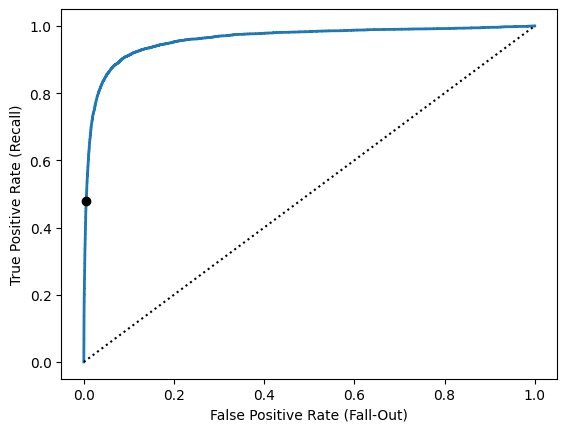

In [35]:
plt.plot(fpr, tpr, linewidth = 2, label = 'ROC curve')
plt.plot([0,1], [0,1], 'k:', label = "Random classifier's ROC curve")
plt.plot([fpr_90],[tpr_90], "ko", label = "Threshold for 90% precision")
plt.xlabel("False Positive Rate (Fall-Out)")
plt.ylabel("True Positive Rate (Recall)")
plt.show()

In [36]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [37]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)


In [38]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = "predict_proba")

In [40]:
y_scores_forest = y_probas_forest[:,1]
